In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import figure
from PIL import Image
from skimage import morphology
import time
#133628711111

In [2]:
sharpen_kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
def sharpenit(img):
    return cv2.filter2D(image, -1, sharpen_kernel)
def dilateit(img,n):
    return cv2.dilate(img,np.ones((n,n), np.uint8),iterations=1)
def erodeit(img,n):
    return cv2.erode(img,np.ones((n,n), np.uint8),iterations=1)
def blurit(img,n):
    return cv2.blur(img,(n,n))
def notit(img):
    return cv2.bitwise_not(img)
def greyit(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
def thresholdit(img,n):
    ret,thresh1 = cv2.threshold(img,n,255,cv2.THRESH_BINARY)
    return thresh1
def cannyit(img):
    return cv2.Canny(img,60,200)
def saveit(img,instruction):
    strr=time.strftime("%H-%M-%S_%d-%m-%Y")
    path='sudoku images/'+instruction+'_'+strr+'.jpg'
    cv2.imwrite(path,img)
def printpixel(color,img):
    y,x=img.shape[0],img.shape[1]
    pixel=np.zeros((y,x))
    for i in range(y):
        for j in range(x):
            pixel[i][j]=color
    chartit(pixel,1)
def make(img):
    img=cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,5,2)
    #img=cv2.bitwise_not(img)
    #imgg=cv2.medianBlur(img,3)
    return img
def showit(img):
    cv2.imshow('Hello',img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
def chartit(img,n):
    #fname = 'image.png'
    #img=img.convert("L")
    figure(num=None, figsize=(n,n), dpi=80, edgecolor='k')
    arr = np.asarray(img)
    plt.imshow(arr, cmap='gray', vmin=0, vmax=255)
    plt.show()
    return
    #plt.show()
    #plt.imshow(img)
def printbychar(img):
    y,x=img.shape
    for i in range (0,y):
        for j in range (0,x):
            if(img[i][j]==0):
                print("●",end="")
            else:
                print("○",end="")
        print()
    return
def printbyval(img):
    y,x=img.shape
    for i in range (0,y):
        for j in range (0,x):
            print(img[i][j],end=' ')
        print()
    return

#  HOUGHLINES Function detect WHITE lines on Black Background

In [3]:
def make(img):
    img=cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,13,2)
    #img=cv2.bitwise_not(img)
    #imgg=cv2.medianBlur(img,3)
    return img
def setimg(img):
    #img=greyit(img)
    y,x=img.shape
    if x==0 or y==0:
        raise Exception("Image Dimension = 0") 
        #print("Image dimension == 0")
        #return
    if(x!=28 or y!=28):
        img=cv2.resize(img,(28,28),interpolation = cv2.INTER_AREA)
    return img
def predit(img):
    ## chartit(img,1)
    y,x=img.shape
    ## print(img.shape)
    if(y!=28 or x!=28):
        img=setimg(img)
        ## print("changing shapes ",img.shape)
    
    count=0
    for i in range(0,28):
        for j in range(0,28):
            if(img[i][j]>=200):
                count=count+1
    if(count<=15):
        print("declaring 0 as pixels =",count)
        return 0
    img = tf.cast(img, tf.float32)
    set1=img
    set1=np.expand_dims(img,axis=2) 
    set1=np.expand_dims(set1,axis=0)
    ## print(set1.shape)
    i=model.predict(set1)
    return (np.argmax(i))
def remnoise(img,n):
    # Works on Black Background with White fonts
    #img=greyit(img)
    binarized = np.where(img>0.1, 1, 0)
    processed = morphology.remove_small_objects(binarized.astype(bool),min_size=n, connectivity=2).astype(int)
    mask_x, mask_y = np.where(processed == 0)
    img[mask_x, mask_y] = 256
    return img
def printarr(arr):
    #r=arr.shape[0]
    for i in range(0,81):
        print(i)
        chartit(arr[i],1)

# detect all small lines location inside sudoku
# Limit image from up down left right etc

In [4]:
def trimimage(image):
    #chartit(image)
    img2=erodeit(image,4)
    #img2=thresholdit(img2)
    img=cannyit(img2)
    lines = cv2.HoughLinesP(img,rho = 1,theta = 1*np.pi/180,threshold = 100,minLineLength = 100,maxLineGap = 1000)
    #print("number of lines = " , lines.shape)
    #print(lines)
    N = lines.shape[0]
    img1=img.copy()
    img3=img.copy()
    img1[:,:]=0
    for i in range(N):
        x1 = lines[i][0][0]
        y1 = lines[i][0][1]
        x2 = lines[i][0][2]
        y2 = lines[i][0][3]
        img1=cv2.line(img1,(x1,y1),(x2,y2),(256,256,256),1)
        img3=cv2.line(img3,(x1,y1),(x2,y2),(256,256,256),1)
    chartit(img1,5)
    chartit(img3,5)
    lsthori=np.zeros((lines.shape[0],2))
    lstvert=np.zeros((lines.shape[0],2))
    lsth=0
    lstv=0
    for i in range (lines.shape[0]):
        x1 = lines[i][0][0]
        y1 = lines[i][0][1]
        x2 = lines[i][0][2]
        y2 = lines[i][0][3]
        '''
        xdiff=x2-x1
        ydiff=y2-y1
        if xdiff<0:
            xdiff=xdiff*(-1)
        if ydiff<0:
            ydiff=ydiff*(-1)
        '''
        if (x2-x1)==0:
            slope=1000
        else:
            slope=(y2-y1)/(x2-x1)
            
        if slope<0.25 and slope>-0.25:
            lsthori[lsth][0]=(y2+y1)/2
            lsthori[lsth][1]=slope
            lsth=lsth+1
            continue
        if slope<=-10 or slope>=10:
            lstvert[lstv][0]=(x2+x1)/2
            lstvert[lstv][1]=slope
            lstv=lstv+1
            continue
    #chartit(img12,10)
    # print("Horizontal Points\n",lsthori)
    # print("Vertical Points\n",lstvert)
    bottom=lsthori[0][0]
    top=lsthori[0][0]
    right=lstvert[0][0]
    left=lstvert[0][0]
    
    for i in range(lsth):
        if bottom<lsthori[i][0]:
            bottom=lsthori[i][0]
        if top>lsthori[i][0]:
            top=lsthori[i][0]
    for i in range(lstv):
        if right<lstvert[i][0]:
            right=lstvert[i][0]
        if left>lstvert[i][0]:
            left=lstvert[i][0]
    
    #print(top," ",bottom)
    #print(left," ",right)
    top=int(top)
    bottom=int(bottom)
    left=int(left)
    right=int(right)
    trimimggg=image[top:bottom,left:right]
    chartit(trimimggg,5)
    arr,loc=getnum(image,trimimggg,bottom,left,top,right)
    return arr,loc

#    for i in range(lsth):
#    print(lsthori[i][0]," ",lsthori[i][1])
#    for i in range(lstv):
#    print(lstvert[i][0]," ",lstvert[i][1])

In [5]:
def getnum(img,trimg,b,l,t,r):
    # img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    # print("in getnum")
    # chartit(trimg,5)
    imgy=img.shape[0]
    imgx=img.shape[1]
    trimgy=trimg.shape[0]
    trimgx=trimg.shape[1]
    xx=trimgx/18
    yy=trimgy/18
    xc=trimgx/90
    yc=trimgy/90
    ii=0
    arry=[]
    loc=[]
    #images=np.array((81,))
    for j in range(9):
        for i in range(9):
            left=l+2*i*xx
            if left-xx>=0:
                left=left-xc
            else:
                left=0
            
            right=l+2*(i+1)*xx
            if right+xx<=imgx:
                right=right+xc
            else:
                right=imgx
            
            top=t+2*j*yy
            if top-yy>=0:
                top=top-yc
            else:
                top=0
            
            bottom=t+2*(j+1)*yy
            if bottom+yy<=imgy:
                bottom=bottom+yc
            else:
                bottom=imgy
            print("Image ",i+1," ",j+1)
            top=int(top)
            bottom=int(bottom)
            right=int(right)
            left=int(left)
            im=img[top:bottom,left:right]
            #im=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
            arry.append(im)
            loc.append([top,bottom,left,right])
            chartit(im,1)
            '''
            ret,thrh = cv2.threshold(im,160,255,cv2.THRESH_BINARY)
            chartit(im,2)
            name='Images/Numbers/num'+str(ii)+".jpg"
            cv2.imwrite(name,im)
            ii=ii+1
            '''
            #val=pt.image_to_string(thrh)
            #print("\"",val,"\"")
            print(im.shape)
    return arry,loc
'''
img=img2
top,bottom,left,right,trimg=trimimage(img)
#chartit(img)
print("left ",left)
print("right ",right)
print("top ",top)
print("bottom ",bottom)
getnum(img,trimg,bottom,left,top,right)
'''

'\nimg=img2\ntop,bottom,left,right,trimg=trimimage(img)\n#chartit(img)\nprint("left ",left)\nprint("right ",right)\nprint("top ",top)\nprint("bottom ",bottom)\ngetnum(img,trimg,bottom,left,top,right)\n'

In [4]:
    def set_putimage(img,num,up,down,left,right):
        ar=[]
        for i in range(0,10):
            address="Numbers/"+str(i)+".jpg"
            a=cv2.imread(address,0)
            ar.append(a)
        
        #for i in range(0,10):
        #    chartit(ar[i],1)
        
        colar=np.array((10,28,28,3))
        colar2=ar.copy()
        colar2=np.expand_dims(colar2,3)
        print(colar2.shape)
        '''
        for k in range(0,9):
            a=ar[k]
            y=a.shape[0]
            x=a.shape[1]
            for i in range(0,y):
                for j in range(0,x):
                    if(a[j][i]>200):
                        colar[k][j][i][0]=256
                        colar[k][j][i][1]=0
                        colar[k][j][i][2]=0
                    else:
                        colar[k][j][i][0]=0
                        colar[k][j][i][1]=0
                        colar[k][j][i][2]=0
        
        for i in range(0,9):
            a=colar[i]
            chartit(i,1)
        '''
        '''
        a=ar[num-1]
        x1=left
        y1=up
        x2=right
        y2=down
        dy=int((y2-y1)*0.90)
        dx=int((x2-x1)*0.90)
        padx=int(dx/10)
        pady=int(dy/10)
        img=cv2.resize(img,(dx,dy),interpolation = cv2.INTER_AREA)
        chartit(img,1)
        for i in range(x1,x1+dx):
            for j in range(y1,y1+dy):
                img[i][j]=a[i-x1][j-y1]
        chartit(img,5)
        '''
    def main():
        a,b,c,d=loc[0]
        set_putimage(img,6,a,b,c,d)
        
        '''
        img2=cv2.imread('sudoku images/original_image.jpg')
        img3=cv2.imread('sudoku images/00_55_32--17_10_2020.jpg')
        img=img3
        # showit(img)
        img=greyit(img)
        img=make(img)
        img=cv2.bitwise_not(img)
        img=remnoise(img,45)
        img=cv2.bitwise_not(img)
        chartit(img,5)
        
        ar,loc=trimimage(img)
        '''
    main()

NameError: name 'loc' is not defined

In [3]:
def imagefromcam():
    img2=np.zeros((1,1,1))
    cam=cv2.VideoCapture(0)
    while True:
        ret_val,img=cam.read()
        lines = cv2.HoughLinesP(cannyit(img),rho = 1,theta = 1*np.pi/180,
                                threshold = 100,minLineLength = 100,maxLineGap = 10)
        cv2.imshow("Window",img)
        img1=img.copy()
        try:
            N = lines.shape[0]
        except:
            N=0
        for i in range(N):
            x1 = lines[i][0][0]
            y1 = lines[i][0][1]
            x2 = lines[i][0][2]
            y2 = lines[i][0][3]
            img1=cv2.line(img1,(x1,y1),(x2,y2),(256,256,256),1)
        cv2.imshow("Window",img1)
        img2=img.copy()
        if cv2.waitKey(1) & 0xFF == ord('x'):
            cv2.destroyAllWindows()
            break
    del(cam)
    return img2
'''
img2=np.zeros((1,1,1))
cam=cv2.VideoCapture(0)
while True:
    ret_val,img=cam.read()
    lines = cv2.HoughLinesP(cannyit(img),rho = 1,theta = 1*np.pi/180,
                            threshold = 100,minLineLength = 100,maxLineGap = 10)
    cv2.imshow("Window",img)
    img1=img.copy()
    try:
        N = lines.shape[0]
    except:
        N=0
    for i in range(N):
        x1 = lines[i][0][0]
        y1 = lines[i][0][1]
        x2 = lines[i][0][2]
        y2 = lines[i][0][3]
        img1=cv2.line(img1,(x1,y1),(x2,y2),(256,256,256),1)
    cv2.imshow("Window",img1)
    img2=img.copy()
    if cv2.waitKey(1) & 0xFF == ord('x'):
        cv2.destroyAllWindows()
        break
del(cam)
'''
#imgg=imagefromcam()
img2=cv2.imread('sudoku images/original_image.jpg')
img3=cv2.imread('sudoku images/00_55_32--17_10_2020.jpg')
img=img3
# showit(img)
img=greyit(img)
img=make(img)
img=cv2.bitwise_not(img)
img=remnoise(img,45)
img=cv2.bitwise_not(img)
chartit(img,5)

#top,bottom,left,right,trimg=trimimage(img)
#arry=getnum(img,trimg,bottom,left,top,right)
ar,loc=trimimage(img)

NameError: name 'remnoise' is not defined

In [43]:
#chartit(img,5)
#cv2.imwrite('sudoku images/sudoku.jpg',img)
'''
for i in range(0,81):
    print(i)
    chartit(ar[i],1)
'''

36   91   43   98
[36, 91, 43, 98]


'\nfor i in range(0,81):\n    print(i)\n    chartit(ar[i],1)\n'

# Y - Coordinate first , X - Coordinate Second

In [26]:
import tensorflow as tf
from tensorflow import keras
from keras import models
#model.save('simple_sequential_model')
model1 = keras.models.load_model('models/simple_sequential_model')
#model2=keras.models.load_model('models/ResNet164.h5')
#model3=keras.models.load_model('models/SuperLearner.h5')
#model4=keras.models.load_model('models/my_model.h5')
model_new=keras.models.load_model('new_model.h5')
model=model_new

In [8]:
def trimimg1(img): # Identifies black lines on white background
    ## print('hello',img.shape)
    imgg=img.copy()
    y=img.shape[0]
    x=img.shape[1]
    img=erodeit(img,2)
    vacx=int(x/4)
    vacy=int(y/4)
    #vacx=int((3*x)/8)
    #vacy=int((3*y)/8)
    top=0
    bottom=y-1
    left=0
    right=x-1
    
    mid=int(y/2)
    midsta=0
    if y%2==0:
        midsta=int(y/2)
    else:
        midsta=int((y/2)+1)
    for i in range(0,mid):
        vacant1=0
        vacant2=0
        interrupt=0
        if top==0:
            for j in range(0,x):
                if(img[mid-i-1][j]!=0):
                    if(vacant1<=vacx):
                        vacant1=vacant1+1
                        continue
                    interrupt=1
                    break
            if interrupt==0:
                top=mid-i
        interrupt=0
        if bottom==y-1:
            for j in range(0,x):
                if(img[mid+i][j]!=0):
                    if(vacant2<=vacx):
                        vacant2=vacant2+1
                        continue
                    interrupt=1
                    break
            if interrupt==0:
                bottom=mid+i
    
    mid=int(x/2)
    midsta=0
    if x%2==0:
        midsta=int(x/2)
    else:
        midsta=int((x/2)+1)
    
    for i in range(0,mid-1):
        vacant1=0
        vacant2=0
        interrupt=0
        if left==0:
            for j in range(0,y):
                if(img[j][mid-i-1]!=0):
                    if(vacant1<=vacy):
                        vacant1=vacant1+1
                        continue
                    interrupt=1
                    break
            if interrupt==0:
                left=mid-i
        interrupt=0
        if right==x-1:
            for j in range(0,y):
                if(img[j][mid+i]!=0):
                    if(vacant2<=vacy):
                        vacant2=vacant2+1
                        continue
                    interrupt=1
                    break
            if interrupt==0:
                right=mid+i
    top=top+1
    left=left+1
    right=right-1
    img=img[top:bottom,left:right]
    
    #img=imgg[top:bottom,left:right]
    
    img=setimg(img)
    img=cv2.bitwise_not(img)
    img=remnoise(img,30)
    img=cv2.bitwise_not(img)
    return img

# New Version

in images
0


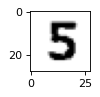

1


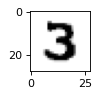

2


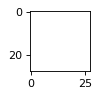

3


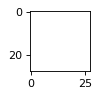

4


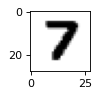

5


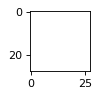

6


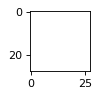

7


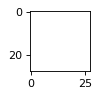

8


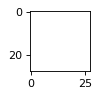

9


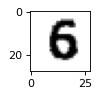

10


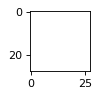

11


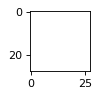

12


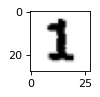

13


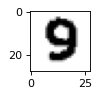

14


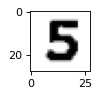

15


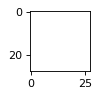

16


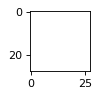

17


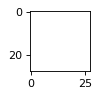

18


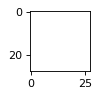

19


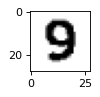

20


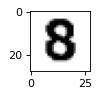

21


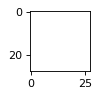

22


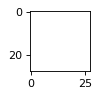

23


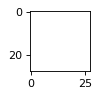

24


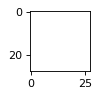

25


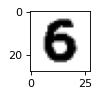

26


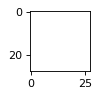

27


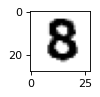

28


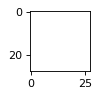

29


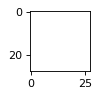

30


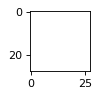

31


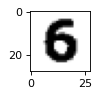

32


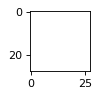

33


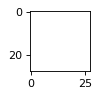

34


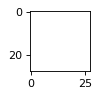

35


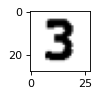

36


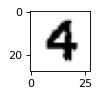

37


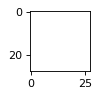

38


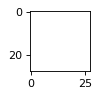

39


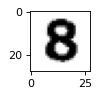

40


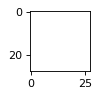

41


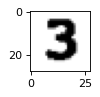

42


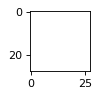

43


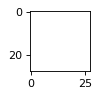

44


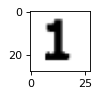

45


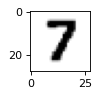

46


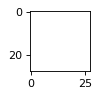

47


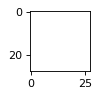

48


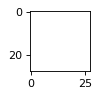

49


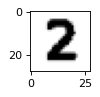

50


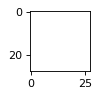

51


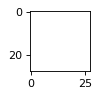

52


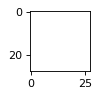

53


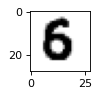

54


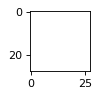

55


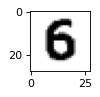

56


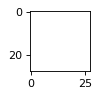

57


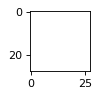

58


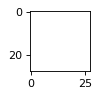

59


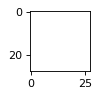

60


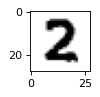

61


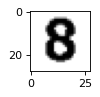

62


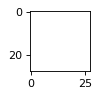

63


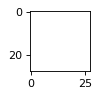

64


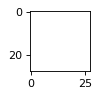

65


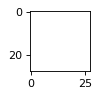

66


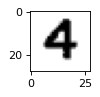

67


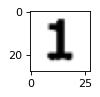

68


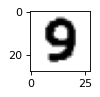

69


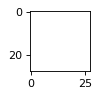

70


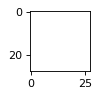

71


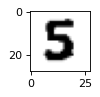

72


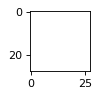

73


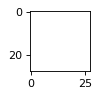

74


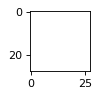

75


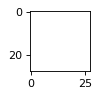

76


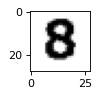

77


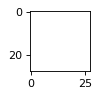

78


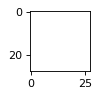

79


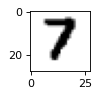

80


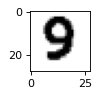

In [63]:
def images(arrr):
    arr2=[]
    print("in images")
    for i in range(0,81):
        img=arrr[i]
        #print(i)
        img=cv2.bitwise_not(img)
        img=remnoise(img,20)
        img=cv2.bitwise_not(img)
        img=trimimg1(img)
        img=setimg(img)
        #img=dilateit(img,3)
        #img=cv2.bitwise_not(img)
        #img = cv2.erode(img, np.ones((4,4), np.uint8) , iterations=1)
        #img = cv2.dilate(img, np.ones((2,2), np.uint8) , iterations=1)
        #img=cv2.bitwise_not(img)
        arr2.append(img)
    
    #for i in range(0,81):
    #    chartit(arr2[i],1)
    return arr2
'''
#for i in arr:
#    chartit(i,1)
#ar=images(arr)
print("---------------------------------")

'''
arr=images(ar)
for i in range(0,81):
    print(i)
    chartit(arr[i],1)

in images
0


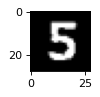

5
----------
1


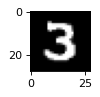

3
----------
2
declaring 0 as pixels = 0


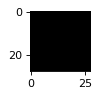

0
----------
3
declaring 0 as pixels = 0


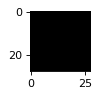

0
----------
4


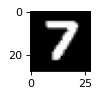

7
----------
5
declaring 0 as pixels = 0


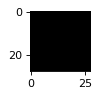

0
----------
6
declaring 0 as pixels = 0


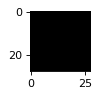

0
----------
7
declaring 0 as pixels = 0


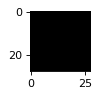

0
----------
8
declaring 0 as pixels = 0


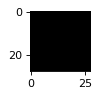

0
----------
9


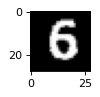

6
----------
10
declaring 0 as pixels = 0


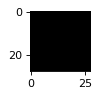

0
----------
11
declaring 0 as pixels = 0


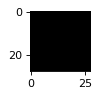

0
----------
12


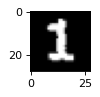

1
----------
13


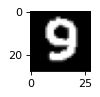

9
----------
14


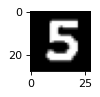

5
----------
15
declaring 0 as pixels = 0


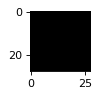

0
----------
16
declaring 0 as pixels = 0


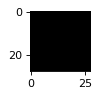

0
----------
17
declaring 0 as pixels = 0


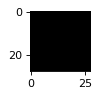

0
----------
18
declaring 0 as pixels = 0


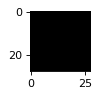

0
----------
19


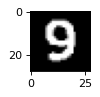

9
----------
20


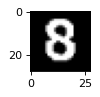

8
----------
21
declaring 0 as pixels = 0


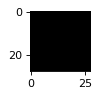

0
----------
22
declaring 0 as pixels = 0


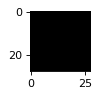

0
----------
23
declaring 0 as pixels = 0


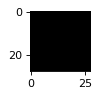

0
----------
24
declaring 0 as pixels = 0


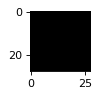

0
----------
25


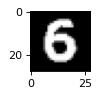

6
----------
26
declaring 0 as pixels = 0


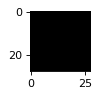

0
----------
27


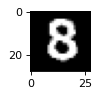

8
----------
28
declaring 0 as pixels = 0


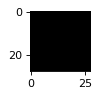

0
----------
29
declaring 0 as pixels = 0


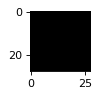

0
----------
30
declaring 0 as pixels = 0


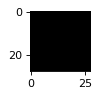

0
----------
31


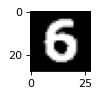

6
----------
32
declaring 0 as pixels = 0


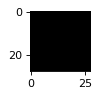

0
----------
33
declaring 0 as pixels = 0


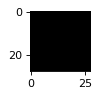

0
----------
34
declaring 0 as pixels = 0


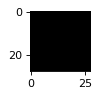

0
----------
35


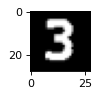

3
----------
36


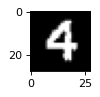

4
----------
37
declaring 0 as pixels = 0


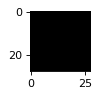

0
----------
38
declaring 0 as pixels = 0


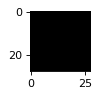

0
----------
39


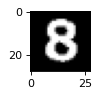

8
----------
40
declaring 0 as pixels = 0


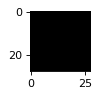

0
----------
41


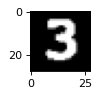

3
----------
42
declaring 0 as pixels = 0


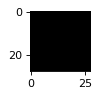

0
----------
43
declaring 0 as pixels = 0


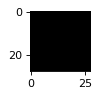

0
----------
44


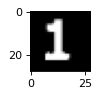

1
----------
45


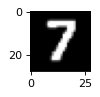

7
----------
46
declaring 0 as pixels = 0


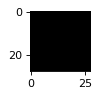

0
----------
47
declaring 0 as pixels = 0


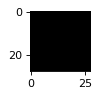

0
----------
48
declaring 0 as pixels = 0


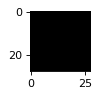

0
----------
49


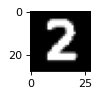

2
----------
50
declaring 0 as pixels = 0


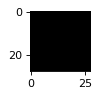

0
----------
51
declaring 0 as pixels = 0


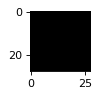

0
----------
52
declaring 0 as pixels = 0


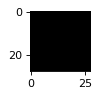

0
----------
53


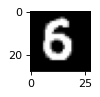

6
----------
54
declaring 0 as pixels = 0


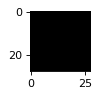

0
----------
55


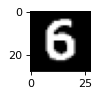

6
----------
56
declaring 0 as pixels = 0


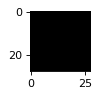

0
----------
57
declaring 0 as pixels = 0


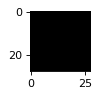

0
----------
58
declaring 0 as pixels = 0


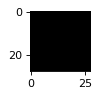

0
----------
59
declaring 0 as pixels = 0


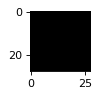

0
----------
60


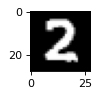

2
----------
61


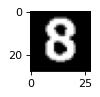

8
----------
62
declaring 0 as pixels = 0


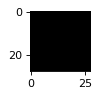

0
----------
63
declaring 0 as pixels = 0


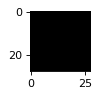

0
----------
64
declaring 0 as pixels = 0


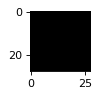

0
----------
65
declaring 0 as pixels = 0


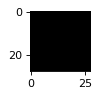

0
----------
66


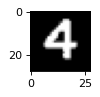

4
----------
67


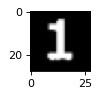

1
----------
68


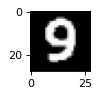

9
----------
69
declaring 0 as pixels = 0


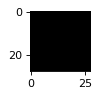

0
----------
70
declaring 0 as pixels = 0


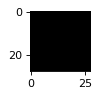

0
----------
71


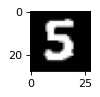

5
----------
72
declaring 0 as pixels = 0


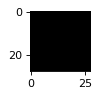

0
----------
73
declaring 0 as pixels = 0


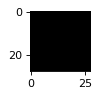

0
----------
74
declaring 0 as pixels = 0


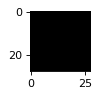

0
----------
75
declaring 0 as pixels = 0


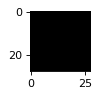

0
----------
76


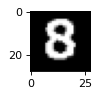

8
----------
77
declaring 0 as pixels = 0


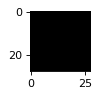

0
----------
78
declaring 0 as pixels = 0


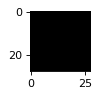

0
----------
79


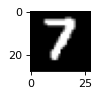

7
----------
80


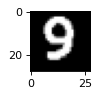

9
----------
[[5. 3. 0. 0. 7. 0. 0. 0. 0.]
 [6. 0. 0. 1. 9. 5. 0. 0. 0.]
 [0. 9. 8. 0. 0. 0. 0. 6. 0.]
 [8. 0. 0. 0. 6. 0. 0. 0. 3.]
 [4. 0. 0. 8. 0. 3. 0. 0. 1.]
 [7. 0. 0. 0. 2. 0. 0. 0. 6.]
 [0. 6. 0. 0. 0. 0. 2. 8. 0.]
 [0. 0. 0. 4. 1. 9. 0. 0. 5.]
 [0. 0. 0. 0. 8. 0. 0. 7. 9.]]


In [33]:
def predictsudoku(arrn):
    ary=np.zeros((9,9))
    for i in range(0,81):
        print(i)
        img=arrn[i]
        
        #img=thresholdit(img,100)
        img=cv2.bitwise_not(img)
        
        num=predit(img)
        chartit(img,1)
        print(num)
        
        #stri=pt.image_to_string(img,config=("-c tessedit"
        #          "_char_whitelist=123456789"
        #          " --psm 10"
        #          " -l osd"
        #          " "))
        #print(stri)
        #if(stri=='\x0c'):
        #    ary[int(i/9)][i%9]=0
        #else:
        #    ary[int(i/9)][i%9]=int(stri)
        ary[int(i/9)][i%9]=int(num)
        print('----------')
    return ary
arr=images(ar)
#printarr(arr)
#print('------------------------')
array=predictsudoku(arr)
print(array)
#chartit(img_orig,5)

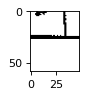

○○○○○○○●○○○○○○●○○○○○○○○○○○○○○○○○●●○○○○○○○○○○○○○○
○○○○○○●●○○○○○●●●○○○○○○○○○○○○○○○○●●○○○○○○○○○○○○○○
○○○○○○●●●●●●●●●●○○○○○○○○○○○○○○○○●●○○○○○○○○○○○○○○
○○○○○●●●●●○○●●○○○○○○○○○○○○○○○○○○●●○○○○○○○○○○○○○○
○○○○○●●●●●●○○●○○○○○○○○○○○○○○○○○○●●○○○○○○○○○○○○○○
○○○○○○●●●○○○○○○○○○○○○○○○○○○○○○○○●●●○○○○○○○○○○○○○
○○○○○○○○○○○○○○○○○○○○○○○○○○○○○○○○●●○○○○○○○○○○○○○○
○○○○○○○○○○○○○○○○○○○○○○○○○○○○○○○○●●○○○○○○○○○○○○○○
○○○○○○○○○○○○○○○○○○○○○○○○○○○○○○○○●●●○○○○○○○○○○○○○
○○○○○○○○○○○○○○○○○○○○○○○○○○○○○○○○●●●○○○○○○○○○○○○○
○○○○○○○○○○○○○○○○○○○○○○○○○○○○○○○○●●○○○○○○○○○○○○○○
○○○○○○○○○○○○○○○○○○○○○○○○○○○○○○○○●●○○○○○○○○○○○○○○
○○○○○○○○○○○○○○○○○○○○○○○○○○○○○○○○●●●○○○○○○○○○○○○○
○○○○○○○○○○○○○○○○○○○○○○○○○○○○○○○○●●●○○○○○○○○○○○○○
○○○○○○○○○○○○○○○○○○○○○○○○○○○○○○○○○●●○○○○○○○○○○○○○
○○○○○○○○○○○○○○○○○○○○○○○○○○○○○○○○○●●○○○○○○○○○○○○○
○○○○○○○○○○○○○○○○○○○○○○○○○○○○○○○○○●●○○○○○○○○○○○○○
○○○○○○○○○○○○○○○○○○○○○○○○○○○○○○○○○●●○○○○○○○○○○○○○
○○○○○○○○○○○○○○○○○○○○○○○○○○○○○○○○○●●○○○○○○○○○○○○○
○○○○○○○○○○○○○○○○○○○○○○○○○○○○○○○○○●●○○○○○○○○○○○○○
○○○○○○○○○○○○○○○○○○○○

In [72]:
count=0
img=arr[79]
img=thresholdit(img,100)
chartit(img,1)
#img=trimimg1(img)
printbychar(img)
for i in range(0,28):
    for j in range(0,28):
        if(img[i][j]>=100):
            count=count+1
print(count)
#saveit(img,"discrepency predicting as 1")

# Creating Showing Digits.

In [ ]:
ar=[]
for i in range(0,10):
    address="Numbers/"+str(i)+".jpg"
    a=cv2.imread(address,0)
    ar.append(a)
aa=[]
for i in range(0,10):
    a=ar[i]
    for k in range(0,28):
        for f in range(0,28):
            if(k<1 or 27-k<1 or f<1 or 27-f<1):
                a[k][f]=0
    aa.append(a)
for i in range(0,10):
    a=aa[i]
    chartit(a,1)
    add='Numbers/'+str(i)+'_border.jpg'
    cv2.imwrite(add,a)

# Function Starts here

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import figure
from PIL import Image
from skimage import morphology
import time
#133628711111

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import models
#model.save('simple_sequential_model')
model1 = keras.models.load_model('models/simple_sequential_model')
#model2=keras.models.load_model('models/ResNet164.h5')
#model3=keras.models.load_model('models/SuperLearner.h5')
#model4=keras.models.load_model('models/my_model.h5')
model_new=keras.models.load_model('new_model.h5')
model=model_new

In [ ]:
sharpen_kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
def sharpenit(img):
    return cv2.filter2D(image, -1, sharpen_kernel)
def dilateit(img,n):
    return cv2.dilate(img,np.ones((n,n), np.uint8),iterations=1)
def erodeit(img,n):
    return cv2.erode(img,np.ones((n,n), np.uint8),iterations=1)
def blurit(img,n):
    return cv2.blur(img,(n,n))
def notit(img):
    return cv2.bitwise_not(img)
def greyit(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
def thresholdit(img,n):
    ret,thresh1 = cv2.threshold(img,n,255,cv2.THRESH_BINARY)
    return thresh1
def cannyit(img):
    return cv2.Canny(img,60,200)
def saveit(img,instruction):
    strr=time.strftime("%H-%M-%S_%d-%m-%Y")
    path='sudoku images/'+instruction+'_'+strr+'.jpg'
    cv2.imwrite(path,img)
def printpixel(color,img):
    y,x=img.shape[0],img.shape[1]
    pixel=np.zeros((y,x))
    for i in range(y):
        for j in range(x):
            pixel[i][j]=color
    chartit(pixel,1)
def make(img):
    img=cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,5,2)
    #img=cv2.bitwise_not(img)
    #imgg=cv2.medianBlur(img,3)
    return img
def showit(img):
    cv2.imshow('Hello',img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
def chartit(img,n):
    #fname = 'image.png'
    #img=img.convert("L")
    figure(num=None, figsize=(n,n), dpi=80, edgecolor='k')
    arr = np.asarray(img)
    plt.imshow(arr, cmap='gray', vmin=0, vmax=255)
    plt.show()
    return
    #plt.show()
    #plt.imshow(img)
def printbychar(img):
    y,x=img.shape
    for i in range (0,y):
        for j in range (0,x):
            if(img[i][j]==0):
                print("●",end="")
            else:
                print("○",end="")
        print()
    return
def printbyval(img):
    y,x=img.shape
    for i in range (0,y):
        for j in range (0,x):
            print(img[i][j],end=' ')
        print()
    return

In [ ]:
def make(img):
    img=cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,13,2)
    #img=cv2.bitwise_not(img)
    #imgg=cv2.medianBlur(img,3)
    return img
def setimg(img):
    #img=greyit(img)
    y,x=img.shape
    if x==0 or y==0:
        raise Exception("Image Dimension = 0") 
        #print("Image dimension == 0")
        #return
    if(x!=28 or y!=28):
        img=cv2.resize(img,(28,28),interpolation = cv2.INTER_AREA)
    return img
def predit(img):
    ## chartit(img,1)
    y,x=img.shape
    ## print(img.shape)
    if(y!=28 or x!=28):
        img=setimg(img)
        ## print("changing shapes ",img.shape)
    
    count=0
    for i in range(0,28):
        for j in range(0,28):
            if(img[i][j]>=200):
                count=count+1
    if(count<=15):
        print("declaring 0 as pixels =",count)
        return 0
    img = tf.cast(img, tf.float32)
    set1=img
    set1=np.expand_dims(img,axis=2) 
    set1=np.expand_dims(set1,axis=0)
    ## print(set1.shape)
    i=model.predict(set1)
    return (np.argmax(i))
def remnoise(img,n):
    # Works on Black Background with White fonts
    #img=greyit(img)
    binarized = np.where(img>0.1, 1, 0)
    processed = morphology.remove_small_objects(binarized.astype(bool),min_size=n, connectivity=2).astype(int)
    mask_x, mask_y = np.where(processed == 0)
    img[mask_x, mask_y] = 256
    return img
def printarr(arr):
    #r=arr.shape[0]
    for i in range(0,81):
        print(i)
        chartit(arr[i],1)

In [ ]:
def show_sudoku(ar,orig):
    dim=28*9
    #image=[[]*dim]*dim
    image=np.zeros((dim,dim))
    arr=[]
    for i in range(0,10):
        address="Numbers/"+str(i)+"_border.jpg"
        a=cv2.imread(address,0)
        arr.append(a)
    
    for i in range(0,9):
        for j in range(0,9):
            l=28*i
            r=28*(i+1)
            u=28*j
            d=28*(j+1)
            
            #print(u,' ',d)
            #print(l,' ',r)
            num=ar[i][j]
            numim=arr[num]
            
            if orig[i][j]!=0:
                numim=cv2.bitwise_not(numim)
            #chartit(numim,1)
            for k in range(0,28):
                for m in range(0,28):
                    #print(u+k,' ',l+m)
                    val=numim[m][k]
                    image[l+m][u+k]=val
    
    chartit(image,5)
'''
ar=[[0,5,0,6,0,4,7,0,0],
    [7,0,6,0,0,0,0,0,9],
    [0,0,0,0,0,5,0,8,0],
    [0,7,0,0,2,0,0,9,3],
    [8,0,0,0,0,9,0,0,5],
    [4,3,0,0,1,0,0,7,0],
    [0,8,7,2,0,0,0,0,0],
    [3,0,0,0,0,0,2,0,8],
    [0,0,2,3,0,1,0,0,8]]
orig=[[0,0,0,6,0,4,7,0,0],
    [7,0,6,0,0,0,0,0,9],
    [0,0,0,0,0,5,0,8,0],
    [0,7,0,0,2,0,0,9,3],
    [8,0,0,0,0,0,0,0,5],
    [4,3,0,0,1,0,0,7,0],
    [0,5,0,2,0,0,0,0,0],
    [3,0,0,0,0,0,2,0,8],
    [0,0,2,3,0,1,0,0,0]]
show_sudoku(ar,orig)
'''

In [ ]:
def checkhorizontal(ar,i,j):
    hor=[1,2,3,4,5,6,7,8,9]
    for jj in range(0,9):
        if ar[i][jj]!=0:
            hor[ar[i][jj]-1]=0
#        if hor[ar[i][jj]-1]==0 and ar[i][jj]!=0:
#            print("Sudoku condition override ",ar[i][jj]," found again.")
#            raise Exception("Exception found here")
        
    return hor

def checkvertical(ar,i,j):
    ver=[1,2,3,4,5,6,7,8,9]
    for ii in range(0,9):
        if ar[ii][j]!=0:
            ver[ar[ii][j]-1]=0
#        if ver[ar[i][ii]-1]==0  and ar[i][ii]!=0:
#            print("Sudoku condition override ",ar[i][ii]," found again.")
#            raise Exception("Exception found here")
    return ver

def checkbox(ar,i,j):
    box=[1,2,3,4,5,6,7,8,9]
    
    pos_r=int((i/3))*3
    pos_c=int((j/3))*3
    
    for i in range (0,9):
        r=int(i/3)
        c=int(i%3)
        #print(pos_r," ",r," ",pos_c," ",c)
        if ar[pos_r+r][pos_c+c]!=0:
            box[ar[pos_r+r][pos_c+c]-1]=0
    
    return box
    #basei=int(i/3)*3
    #basej=int(j/3)*3
    #print('\n\tbase i - ',basei,'\n\tbase j - ',basej)
    #for bb in range(0,9):
    #    print('\ni - ',(basei+int(bb/3)),'\nj - ',(basej+int(bb%3)))
    #    box[ar[basei+int(bb/3)][basej+int(bb%3)]]=0
    #return box

def printing(ar,k):
    print('\n')
    if k==0:
        show_sudoku(ar,ar)
        raise Exception("Completed")
    for i in range(0,9):
        for j in range(0,9):
            print(ar[i][j],end=' ')
        print('\n')
    #    exit()
        
def increment(ar,i,j):
    
    if i==8 and j==8:
        printing(ar,0)
    
    if j<8:
        return i,j+1
    
    return i+1,0

def decrement(ar,i,j):
    if i==0 and j==0:
        printing(ar,0)
        
    if i==8 and j==8:
        printing(ar,0)
        
    if j>0:
        return i,j-1
    
    return i-1,8

def printrow(list):
    for i in range(0,9):
        if list[i]!=0:
            print(i+1,end='')
        else :
            print(0,end='')

#################################################

In [ ]:
def fix(ar,i,j):
    ##print("============================")
    #print(i," ",j)
    hor=checkhorizontal(ar,i,j)
    ver=checkvertical(ar,i,j)
    box=checkbox(ar,i,j)
    ##print(hor)
    ##print(ver)
    ##print(box)
    for pos in range(0,9):
        if hor[pos]!=0 and ver[pos]!=0 and box[pos]!=0:
            ar[i][j]=pos+1
            
            if(i==8 and j==8):
                return ar,1
            ii=i
            jj=j
            while ar[ii][jj]!=0:
                if(ii==8 and jj==8):
                    return ar,1
                ii,jj=increment(ar,ii,jj)
            arr,val=fix(ar,ii,jj)
            if(val==1):
                return arr,1
            ar[i][j]=0
    return ar,0
'''
def main():
    ar=[[0,0,0,6,0,4,7,0,0],
        [7,0,6,0,0,0,0,0,9],
        [0,0,0,0,0,5,0,8,0],
        [0,7,0,0,2,0,0,9,3],
        [8,0,0,0,0,0,0,0,5],
        [4,3,0,0,1,0,0,7,0],
        [0,5,0,2,0,0,0,0,0],
        [3,0,0,0,0,0,2,0,8],
        [0,0,2,3,0,1,0,0,0]]
    printing(ar,1)
    array,val=fix(ar,0,0)
    printing(ar,1)
    print('##################')
main()
'''

In [ ]:
def trimimage(image):
    #chartit(image)
    img2=erodeit(image,4)
    #img2=thresholdit(img2)
    img=cannyit(img2)
    lines = cv2.HoughLinesP(img,rho = 1,theta = 1*np.pi/180,threshold = 100,minLineLength = 100,maxLineGap = 1000)
    #print("number of lines = " , lines.shape)
    #print(lines)
    N = lines.shape[0]
    img1=img.copy()
    img3=img.copy()
    img1[:,:]=0
    for i in range(N):
        x1 = lines[i][0][0]
        y1 = lines[i][0][1]
        x2 = lines[i][0][2]
        y2 = lines[i][0][3]
        img1=cv2.line(img1,(x1,y1),(x2,y2),(256,256,256),1)
        img3=cv2.line(img3,(x1,y1),(x2,y2),(256,256,256),1)
    chartit(img1,5)
    chartit(img3,5)
    lsthori=np.zeros((lines.shape[0],2))
    lstvert=np.zeros((lines.shape[0],2))
    lsth=0
    lstv=0
    for i in range (lines.shape[0]):
        x1 = lines[i][0][0]
        y1 = lines[i][0][1]
        x2 = lines[i][0][2]
        y2 = lines[i][0][3]
        '''
        xdiff=x2-x1
        ydiff=y2-y1
        if xdiff<0:
            xdiff=xdiff*(-1)
        if ydiff<0:
            ydiff=ydiff*(-1)
        '''
        if (x2-x1)==0:
            slope=1000
        else:
            slope=(y2-y1)/(x2-x1)
            
        if slope<0.25 and slope>-0.25:
            lsthori[lsth][0]=(y2+y1)/2
            lsthori[lsth][1]=slope
            lsth=lsth+1
            continue
        if slope<=-10 or slope>=10:
            lstvert[lstv][0]=(x2+x1)/2
            lstvert[lstv][1]=slope
            lstv=lstv+1
            continue
    #chartit(img12,10)
    # print("Horizontal Points\n",lsthori)
    # print("Vertical Points\n",lstvert)
    bottom=lsthori[0][0]
    top=lsthori[0][0]
    right=lstvert[0][0]
    left=lstvert[0][0]
    
    for i in range(lsth):
        if bottom<lsthori[i][0]:
            bottom=lsthori[i][0]
        if top>lsthori[i][0]:
            top=lsthori[i][0]
    for i in range(lstv):
        if right<lstvert[i][0]:
            right=lstvert[i][0]
        if left>lstvert[i][0]:
            left=lstvert[i][0]
    
    #print(top," ",bottom)
    #print(left," ",right)
    top=int(top)
    bottom=int(bottom)
    left=int(left)
    right=int(right)
    trimimggg=image[top:bottom,left:right]
    chartit(trimimggg,5)
    arr,loc=getnum(image,trimimggg,bottom,left,top,right)
    return arr,loc

def getnum(img,trimg,b,l,t,r):
    # img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    # print("in getnum")
    # chartit(trimg,5)
    imgy=img.shape[0]
    imgx=img.shape[1]
    trimgy=trimg.shape[0]
    trimgx=trimg.shape[1]
    xx=trimgx/18
    yy=trimgy/18
    xc=trimgx/90
    yc=trimgy/90
    ii=0
    arry=[]
    loc=[]
    #images=np.array((81,))
    for j in range(9):
        for i in range(9):
            left=l+2*i*xx
            if left-xx>=0:
                left=left-xc
            else:
                left=0
            
            right=l+2*(i+1)*xx
            if right+xx<=imgx:
                right=right+xc
            else:
                right=imgx
            
            top=t+2*j*yy
            if top-yy>=0:
                top=top-yc
            else:
                top=0
            
            bottom=t+2*(j+1)*yy
            if bottom+yy<=imgy:
                bottom=bottom+yc
            else:
                bottom=imgy
            top=int(top)
            bottom=int(bottom)
            right=int(right)
            left=int(left)
            im=img[top:bottom,left:right]
            #im=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
            arry.append(im)
            loc.append([top,bottom,left,right])
            
            print("Image ",i+1," ",j+1)
            chartit(im,1)
            
            '''
            ret,thrh = cv2.threshold(im,160,255,cv2.THRESH_BINARY)
            chartit(im,2)
            name='Images/Numbers/num'+str(ii)+".jpg"
            cv2.imwrite(name,im)
            ii=ii+1
            '''
            #val=pt.image_to_string(thrh)
            #print("\"",val,"\"")
            print(im.shape)
    return arry,loc

def imagefromcam():
    img2=np.zeros((1,1,1))
    cam=cv2.VideoCapture(0)
    while True:
        ret_val,img=cam.read()
        lines = cv2.HoughLinesP(cannyit(img),rho = 1,theta = 1*np.pi/180,
                                threshold = 100,minLineLength = 100,maxLineGap = 10)
        cv2.imshow("Window",img)
        img1=img.copy()
        try:
            N = lines.shape[0]
        except:
            N=0
        for i in range(N):
            x1 = lines[i][0][0]
            y1 = lines[i][0][1]
            x2 = lines[i][0][2]
            y2 = lines[i][0][3]
            img1=cv2.line(img1,(x1,y1),(x2,y2),(256,256,256),1)
        cv2.imshow("Window",img1)
        img2=img.copy()
        if cv2.waitKey(1) & 0xFF == ord('x'):
            cv2.destroyAllWindows()
            break
    del(cam)
    return img2

def trimimg1(img): # Identifies black lines on white background
    ## print('hello',img.shape)
    imgg=img.copy()
    y=img.shape[0]
    x=img.shape[1]
    img=erodeit(img,2)
    vacx=int(x/4)
    vacy=int(y/4)
    #vacx=int((3*x)/8)
    #vacy=int((3*y)/8)
    top=0
    bottom=y-1
    left=0
    right=x-1
    
    mid=int(y/2)
    midsta=0
    if y%2==0:
        midsta=int(y/2)
    else:
        midsta=int((y/2)+1)
    for i in range(0,mid):
        vacant1=0
        vacant2=0
        interrupt=0
        if top==0:
            for j in range(0,x):
                if(img[mid-i-1][j]!=0):
                    if(vacant1<=vacx):
                        vacant1=vacant1+1
                        continue
                    interrupt=1
                    break
            if interrupt==0:
                top=mid-i
        interrupt=0
        if bottom==y-1:
            for j in range(0,x):
                if(img[mid+i][j]!=0):
                    if(vacant2<=vacx):
                        vacant2=vacant2+1
                        continue
                    interrupt=1
                    break
            if interrupt==0:
                bottom=mid+i
    
    mid=int(x/2)
    midsta=0
    if x%2==0:
        midsta=int(x/2)
    else:
        midsta=int((x/2)+1)
    
    for i in range(0,mid-1):
        vacant1=0
        vacant2=0
        interrupt=0
        if left==0:
            for j in range(0,y):
                if(img[j][mid-i-1]!=0):
                    if(vacant1<=vacy):
                        vacant1=vacant1+1
                        continue
                    interrupt=1
                    break
            if interrupt==0:
                left=mid-i
        interrupt=0
        if right==x-1:
            for j in range(0,y):
                if(img[j][mid+i]!=0):
                    if(vacant2<=vacy):
                        vacant2=vacant2+1
                        continue
                    interrupt=1
                    break
            if interrupt==0:
                right=mid+i
    top=top+1
    left=left+1
    right=right-1
    img=img[top:bottom,left:right]
    
    #img=imgg[top:bottom,left:right]
    
    img=setimg(img)
    img=cv2.bitwise_not(img)
    img=remnoise(img,30)
    img=cv2.bitwise_not(img)
    return img

def images(arrr):
    arr2=[]
    print("in images")
    for i in range(0,81):
        img=arrr[i]
        img=cv2.bitwise_not(img)
        img=remnoise(img,20)
        img=cv2.bitwise_not(img)
        img=trimimg1(img)
        img=setimg(img)
        #print(i)
        #chartit(img,1)
        #img=dilateit(img,3)
        #img=cv2.bitwise_not(img)
        #img = cv2.erode(img, np.ones((4,4), np.uint8) , iterations=1)
        #img = cv2.dilate(img, np.ones((2,2), np.uint8) , iterations=1)
        #img=cv2.bitwise_not(img)
        arr2.append(img)
    
    #for i in range(0,81):
    #    chartit(arr2[i],1)
    return arr2

def predictsudoku(arrn):
    ary=np.zeros((9,9))
    for i in range(0,81):
        print(i)
        img=arrn[i]
        
        #img=thresholdit(img,100)
        img=cv2.bitwise_not(img)
        
        num=predit(img)
        # chartit(img,1)
        print(num)
        
        #stri=pt.image_to_string(img,config=("-c tessedit"
        #          "_char_whitelist=123456789"
        #          " --psm 10"
        #          " -l osd"
        #          " "))
        #print(stri)
        #if(stri=='\x0c'):
        #    ary[int(i/9)][i%9]=0
        #else:
        #    ary[int(i/9)][i%9]=int(stri)
        ary[int(i/9)][i%9]=int(num)
        print('----------')
    print(ary)
    return ary

In [28]:
def main():
    #imgg=imagefromcam()
    img2=cv2.imread('sudoku images/original_image.jpg')
    img3=cv2.imread('sudoku images/00_55_32--17_10_2020.jpg')
    img4=cv2.imread('sudoku images/sudoku/su1.jpg')
    img=img4
    # showit(img)
    img=greyit(img)
    img=make(img)
    chartit(img,5)
    img=cv2.bitwise_not(img)
    img=remnoise(img,45)
    img=cv2.bitwise_not(img)
    chartit(img,5)
    #top,bottom,left,right,trimg=trimimage(img)
    #arry=getnum(img,trimg,bottom,left,top,right)
    ar,loc=trimimage(img)
    
    '''
    ar=[[0,0,0,6,0,4,7,0,0],
        [7,0,6,0,0,0,0,0,9],
        [0,0,0,0,0,5,0,8,0],
        [0,7,0,0,2,0,0,9,3],
        [8,0,0,0,0,0,0,0,5],
        [4,3,0,0,1,0,0,7,0],
        [0,5,0,2,0,0,0,0,0],
        [3,0,0,0,0,0,2,0,8],
        [0,0,2,3,0,1,0,0,0]]
    '''
    
    arr_trimmed=images(ar)
    array2=predictsudoku(arr_trimmed)
    array=np.array(array2)
    array=array.astype(int)
    print(array)
    '''
    i=0
    j=0
    while(array[i][j]!=0):
        i,j=increment(array,i,j)
    
    #fix(ar2,i,j)
    
    array_final,val=fix(array,i,j)
    printing(array,1)
    printing(array_final,1)
    show_sudoku(array_final,array2)
    '''
    print('##################')

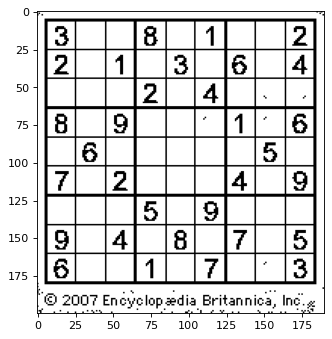

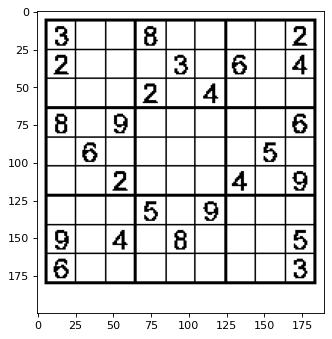

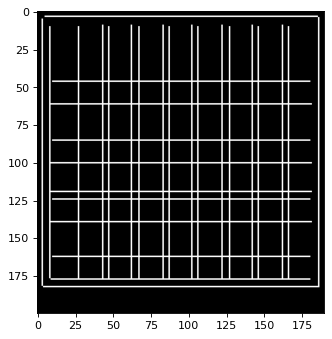

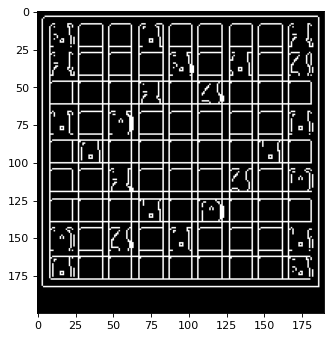

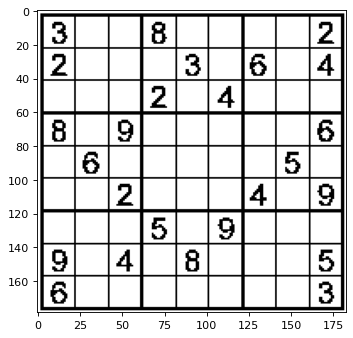

Image  1   1


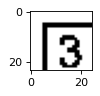

(24, 25)
Image  2   1


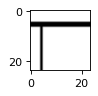

(24, 24)
Image  3   1


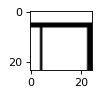

(24, 25)
Image  4   1


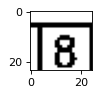

(24, 25)
Image  5   1


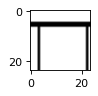

(24, 24)
Image  6   1


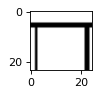

(24, 25)
Image  7   1


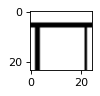

(24, 25)
Image  8   1


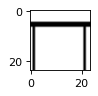

(24, 24)
Image  9   1


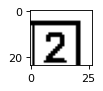

(24, 27)
Image  1   2


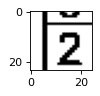

(24, 25)
Image  2   2


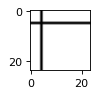

(24, 24)
Image  3   2


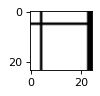

(24, 25)
Image  4   2


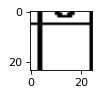

(24, 25)
Image  5   2


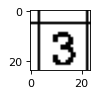

(24, 24)
Image  6   2


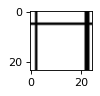

(24, 25)
Image  7   2


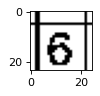

(24, 25)
Image  8   2


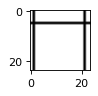

(24, 24)
Image  9   2


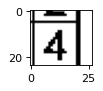

(24, 27)
Image  1   3


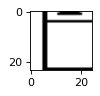

(24, 25)
Image  2   3


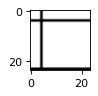

(24, 24)
Image  3   3


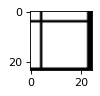

(24, 25)
Image  4   3


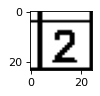

(24, 25)
Image  5   3


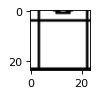

(24, 24)
Image  6   3


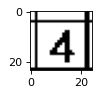

(24, 25)
Image  7   3


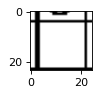

(24, 25)
Image  8   3


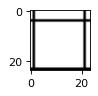

(24, 24)
Image  9   3


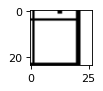

(24, 27)
Image  1   4


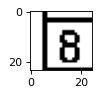

(24, 25)
Image  2   4


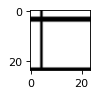

(24, 24)
Image  3   4


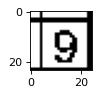

(24, 25)
Image  4   4


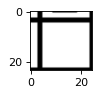

(24, 25)
Image  5   4


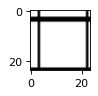

(24, 24)
Image  6   4


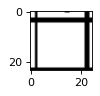

(24, 25)
Image  7   4


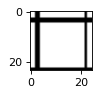

(24, 25)
Image  8   4


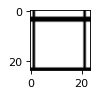

(24, 24)
Image  9   4


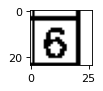

(24, 27)
Image  1   5


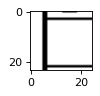

(24, 25)
Image  2   5


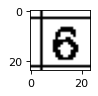

(24, 24)
Image  3   5


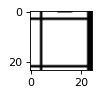

(24, 25)
Image  4   5


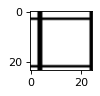

(24, 25)
Image  5   5


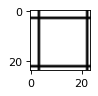

(24, 24)
Image  6   5


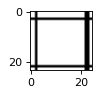

(24, 25)
Image  7   5


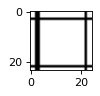

(24, 25)
Image  8   5


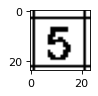

(24, 24)
Image  9   5


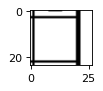

(24, 27)
Image  1   6


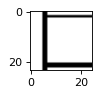

(24, 25)
Image  2   6


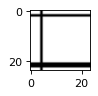

(24, 24)
Image  3   6


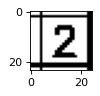

(24, 25)
Image  4   6


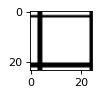

(24, 25)
Image  5   6


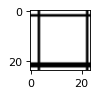

(24, 24)
Image  6   6


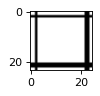

(24, 25)
Image  7   6


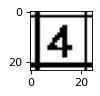

(24, 25)
Image  8   6


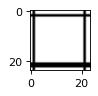

(24, 24)
Image  9   6


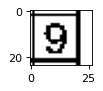

(24, 27)
Image  1   7


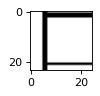

(24, 25)
Image  2   7


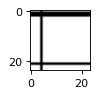

(24, 24)
Image  3   7


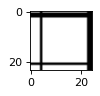

(24, 25)
Image  4   7


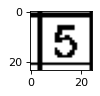

(24, 25)
Image  5   7


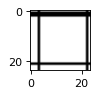

(24, 24)
Image  6   7


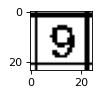

(24, 25)
Image  7   7


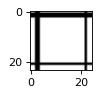

(24, 25)
Image  8   7


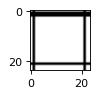

(24, 24)
Image  9   7


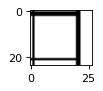

(24, 27)
Image  1   8


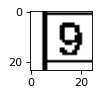

(24, 25)
Image  2   8


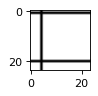

(24, 24)
Image  3   8


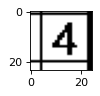

(24, 25)
Image  4   8


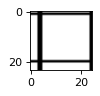

(24, 25)
Image  5   8


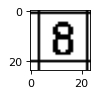

(24, 24)
Image  6   8


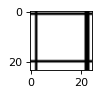

(24, 25)
Image  7   8


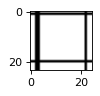

(24, 25)
Image  8   8


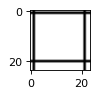

(24, 24)
Image  9   8


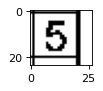

(24, 27)
Image  1   9


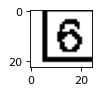

(23, 25)
Image  2   9


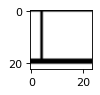

(23, 24)
Image  3   9


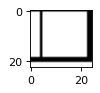

(23, 25)
Image  4   9


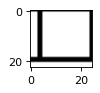

(23, 25)
Image  5   9


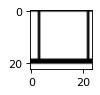

(23, 24)
Image  6   9


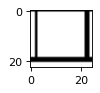

(23, 25)
Image  7   9


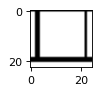

(23, 25)
Image  8   9


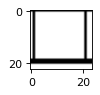

(23, 24)
Image  9   9


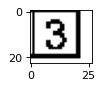

(23, 27)
in images


Exception: Image Dimension = 0

In [29]:
main()

In [39]:
hello=np.array([[.5,55435.34,3464.56],
      [.5,55435.34,3464.56]])

In [40]:
print(hello)
hello.astype(int)

[[5.000000e-01 5.543534e+04 3.464560e+03]
 [5.000000e-01 5.543534e+04 3.464560e+03]]


array([[    0, 55435,  3464],
       [    0, 55435,  3464]])

In [ ]:
#cam=cv2.VideoCapture(0)
#ret_val,img=cam.read()
#del(cam)
'''
import pytesseract as pt
pt.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

stri=pt.image_to_string(thrs,config=("-c tessedit"
                  "_char_whitelist=123456789"
                  " --psm 10"
                  " -l osd"
                  " "))
'''